In [36]:
import csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Leaving this here to remind us that there are other datasets we have yet to use

# features_df = pd.read_csv("features.csv")
# print(features_df)

# stores_df = pd.read_csv("stores.csv")
# print(stores_df)

# test_df = pd.read_csv("test.csv")
# print(tt_df)

In [3]:
# Initial loading of original train dataframe 
train_df = pd.read_csv("train.csv")
print(train_df)
total_number_of_rows = len(train_df)
print(total_number_of_rows)

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]
421570


             Date  Weekly_Sales        Total  Year  Month  Day
0      2010-02-05      24924.50  49750740.50  2010      2    5
1      2010-02-12      46039.49  48336677.63  2010      2   12
2      2010-02-19      41595.55  48276993.78  2010      2   19
3      2010-02-26      19403.54  43968571.13  2010      2   26
4      2010-03-05      21827.90  46871470.30  2010      3    5
...           ...           ...          ...   ...    ...  ...
421565 2012-09-28        508.37  43734899.40  2012      9   28
421566 2012-10-05        628.10  47566639.31  2012     10    5
421567 2012-10-12       1061.02  46128514.25  2012     10   12
421568 2012-10-19        760.01  45122410.57  2012     10   19
421569 2012-10-26       1076.80  45544116.29  2012     10   26

[421570 rows x 6 columns]


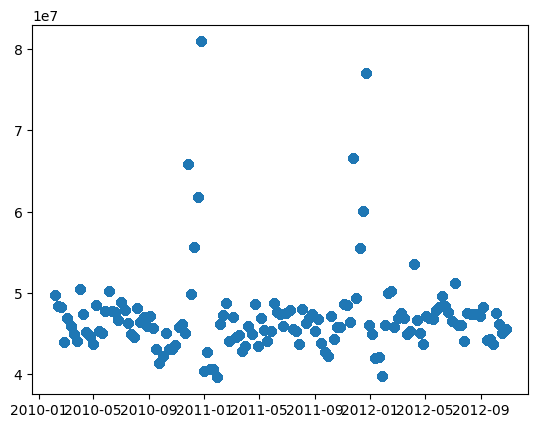

In [42]:
train_time_series = train_df[["Date", "Weekly_Sales"]]

train_time_series['Total'] = train_time_series['Weekly_Sales'].groupby(train_time_series['Date']).transform('sum')

train_time_series["Date"] = pd.to_datetime(train_time_series["Date"], format = "%Y-%m-%d")
train_time_series['Year'] = train_time_series["Date"].dt.year
train_time_series['Month'] = train_time_series["Date"].dt.month
train_time_series['Day'] = train_time_series["Date"].dt.day

print(train_time_series)
plt.scatter(train_time_series["Date"], train_time_series["Total"])

In [4]:
# Parse date column into year, month, date columns and add to dataframe for regression
train_df["Date"] = pd.to_datetime(train_df["Date"], format = "%Y-%m-%d")
train_df['Year'] = train_df["Date"].dt.year
train_df['Month'] = train_df["Date"].dt.month
train_df['Day'] = train_df["Date"].dt.day
print(train_df[["Store", "Dept", "Month", "Day", "Weekly_Sales"]])

        Store  Dept  Month  Day  Weekly_Sales
0           1     1      2    5      24924.50
1           1     1      2   12      46039.49
2           1     1      2   19      41595.55
3           1     1      2   26      19403.54
4           1     1      3    5      21827.90
...       ...   ...    ...  ...           ...
421565     45    98      9   28        508.37
421566     45    98     10    5        628.10
421567     45    98     10   12       1061.02
421568     45    98     10   19        760.01
421569     45    98     10   26       1076.80

[421570 rows x 5 columns]


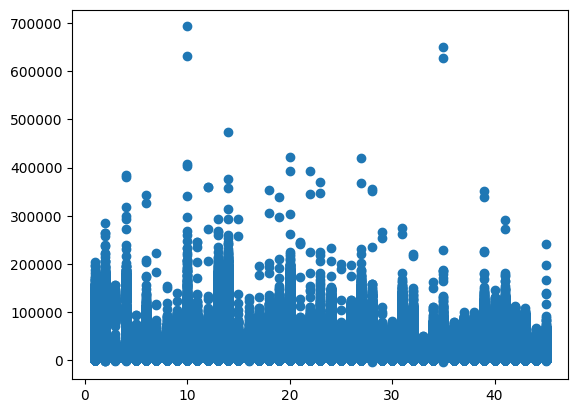

In [5]:
plt.scatter(train_df["Store"], train_df["Weekly_Sales"])

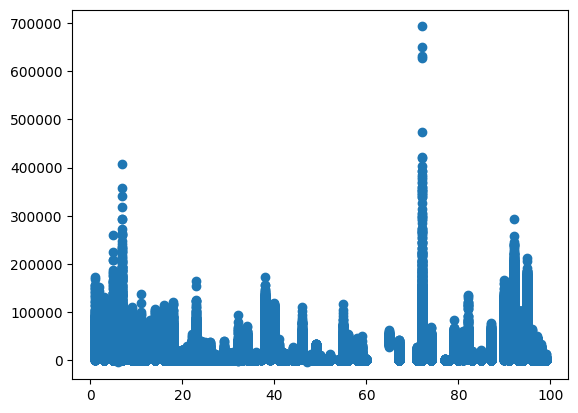

In [6]:
plt.scatter(train_df["Dept"], train_df["Weekly_Sales"])

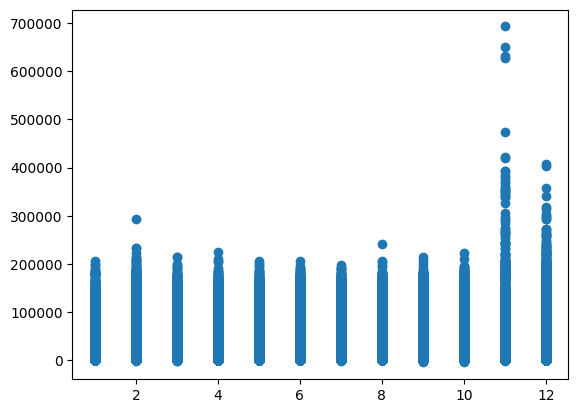

In [7]:
# Simple observation that sales peak around November and December (Thanksgiving and Christmas)
plt.scatter(train_df["Month"], train_df["Weekly_Sales"])

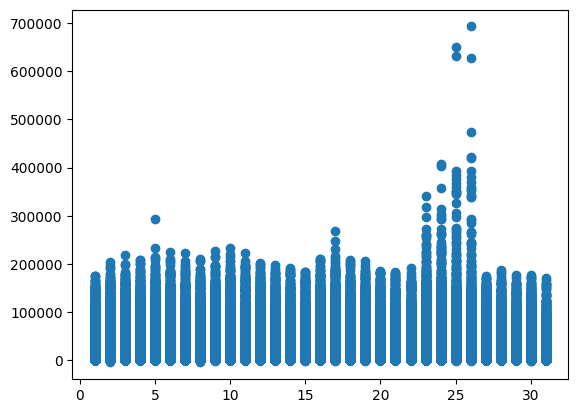

In [8]:
# Simple observbation that sales peak around 25th because of November and December (Thanksgiving and Christmas)
plt.scatter(train_df["Day"], train_df["Weekly_Sales"])

In [9]:
# def dot(u, v):
#     if (len(u) != len(v)):
#         return None
#     toReturn = sum(a*b for [a, b] in zip(u, v))
#     return toReturn

# def mat_mat_mul(A, B):
#     if (len(A[0]) != len(B)):
#         return None
#     toReturn = [[sum(a*b for [a, b] in zip(A[i], transpose_matrix(B)[j])) for j in range(len(B[0]))] for i in range(len(A))]
#     return toReturn

# def mat_vec_mul(A, v):
#     if (len(A[0]) != len(v)):
#         return None
#     toReturn = [sum(a*b for [a, b] in zip(A[i], v)) for i in range(len(A))]
#     return toReturn

# def scal_vec_mul(c, v):
#     toReturn = [c*a for a in v]
#     return toReturn

def mat_transpose(A):
    toReturn = [[A[i][j] for i in range(len(A))] for j in range(len(A[0]))]
    return toReturn

def calculate_ols_beta(X, y):
    np_X = np.array(X)
    np_y = np.array(y)
    np_X_transpose = np.transpose(np_X)
    beta = np.matmul(np.linalg.inv(np.matmul(np_X_transpose, np_X)), np.matmul(np_X_transpose, np_y))
    beta = beta.tolist()
    return beta

def calculate_mean_square_error(X, y, beta):
    np_X = np.array(X)
    np_y = np.array(y)
    np_beta = np.array(beta)
    N = len(np_y)
    diff = y - np.matmul(np_X, np_beta)
    toReturn = np.dot(diff, diff) / N
    return toReturn

In [10]:
%%time

# Naive initial attempt to do ordinary least squares linear regression on given factors directly using all rows

N = total_number_of_rows # 400000

x0 = train_df["Store"].values[:N]
x1 = train_df["Dept"].values[:N]
x2 = train_df["Month"].values[:N]
x3 = train_df["Day"].values[:N]
X = mat_transpose([x0, x1, x2, x3])
y = train_df["Weekly_Sales"].values[:N]

beta = calculate_ols_beta(X, y)
print(beta)

mean_square_error = calculate_mean_square_error(X, y, beta)
print(mean_square_error)

[-19.94123784906833, 159.75042899567768, 824.6637934930632, 191.30425301483592]
513998504.45563215
CPU times: user 1.56 s, sys: 191 ms, total: 1.75 s
Wall time: 1.61 s


24924.5 2745.6580432069154 0.8898409980859429
46039.49 4084.787814310767 0.9112764321605047
41595.55 5423.917585414618 0.8696034170622912
19403.54 6763.047356518469 0.6514529123799848
21827.9 3570.3218366999786 0.8364331045725892
21043.39 4909.4516078038305 0.7666986351626885
22136.64 6248.581378907682 0.7177267471979631
26229.21 7587.711150011533 0.7107152235995086
57258.43 3821.072871148534 0.9332661955427605
42960.91 5160.202642252385 0.879886095470222


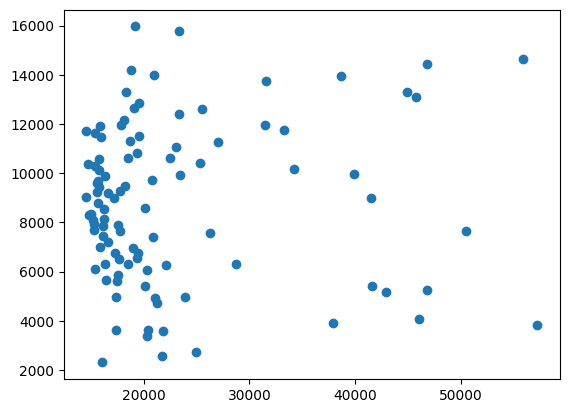

In [11]:
# Print and plot to show how terrible the ordinary least squares is
predict_y = np.matmul(np.array(X), np.array(beta))
N1 = 10
N2 = 100
for i in range(N1):
    print(y[i], predict_y[i], abs(y[i] - predict_y[i]) / y[i])
    
plt.scatter(y[:N2], predict_y[:N2])
plt.show()

In [12]:
# print(train_df.Store.unique())
# print(train_df.groupby("Store").size())

# print(train_df.Dept.unique())
# print(train_df.groupby("Dept").size())

# print(train_df.Date.unique())
# print(train_df.groupby("Date").size())

In [13]:
# nan_rows = train_df.isna().any(axis=1)
# print(train_df[nan_rows])

In [14]:
# grouped_df = train_df[["Date", "Weekly_Sales"]].groupby(["Date"]).sum()
# # print(grouped_df.to_string())
# print(min(grouped_df["Weekly_Sales"]), max(grouped_df["Weekly_Sales"]))
# plt.plot(grouped_df)
# thanksgiving_and_christmas = grouped_df[grouped_df["Weekly_Sales"] > 6 * (10**7)]
# print(thanksgiving_and_christmas)

In [15]:
# all_stores = []
# all_depts = []
# all_dates = []
# all_weekly_sales = []
# all_is_holidays = []

# with open('train.csv', newline = '') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',', quotechar='|')
#     index = 0
#     for row in reader:
#         if (index < 10):
#             print(row)
#         if (index > 0):
#             all_stores.append(int(row[0]))
#             all_depts.append(int(row[1]))
#             all_dates.append(row[2])
#             all_weekly_sales.append(float(row[3]))
#             all_is_holidays.append(row[4])
#         index += 1

In [16]:
# print(len(all_stores))
# print(len(all_depts))
# print(len(all_dates))
# print(len(all_weekly_sales))

In [17]:
# distinct_stores = []
# for store in all_stores:
#     pre_existing = False
#     pos = None
#     for i in range(len(distinct_stores)):
#         if (store == distinct_stores[i][0]):
#             pre_existing = True
#             pos = i
#             break
#     if (pre_existing == False):
#         distinct_stores.append([store, 1])
#     else:
#         distinct_stores[pos][1] += 1
# for store in distinct_stores:
#     print(store)

In [18]:
# N  = 100
# plt.plot(all_dates[:N], all_weekly_sales[:N])